In [1]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
df=pd.read_csv('MindReader2.csv')
M=df.movesPlayer[2]

In [10]:
L=[int(b) for b in M[1:-2].split('L, ')]

In [11]:
len(L)

160

In [17]:
def collect_switches(L):
    Switches=[]
    c=L[0]
    i=1
    for b in L[1:]:
        if c==b:
            i+=1
        else:
            Switches.append(i)
            i=1
            c=b
    return Switches

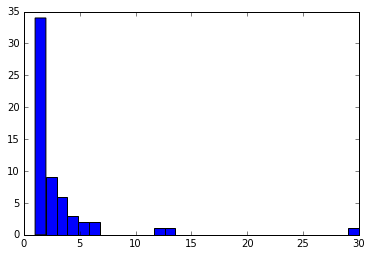

In [19]:
S=collect_switches(L)
hist(S,bins=30);

In [20]:
shape(df)

(6683, 10)

In [26]:
Switches=[]
for i in range(shape(df)[0]):
    M=df.movesPlayer[i]
    L=[int(b) for b in M[1:-2].split('L, ')]
    if(len(L)>20):
        Switches+=collect_switches(L)
    if i % 500 == 0:
        print i,len(Switches)

0 0
500 28039
1000 53362
1500 78025
2000 100839
2500 126723
3000 170439
3500 205117
4000 232769
4500 274298
5000 311563
5500 339419
6000 381990
6500 428172


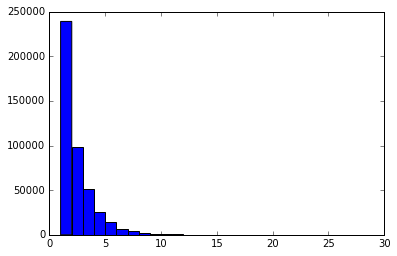

In [39]:
n,bins,patches=hist([s for s in Switches if s < 30],bins=28)


In [40]:
n

array([  2.38988000e+05,   9.86550000e+04,   5.17700000e+04,
         2.59370000e+04,   1.40600000e+04,   6.47100000e+03,
         3.70800000e+03,   1.91400000e+03,   1.17300000e+03,
         6.82000000e+02,   4.19000000e+02,   3.00000000e+02,
         2.09000000e+02,   1.65000000e+02,   1.00000000e+02,
         1.08000000e+02,   8.30000000e+01,   6.90000000e+01,
         4.40000000e+01,   1.74000000e+02,   3.50000000e+01,
         3.30000000e+01,   2.10000000e+01,   2.60000000e+01,
         2.10000000e+01,   2.70000000e+01,   1.80000000e+01,
         2.20000000e+01])

In [41]:
bins

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.])

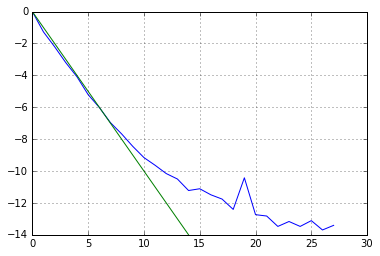

In [51]:
plot([log2(i)-log2(n[0]) for i in n])
plot(arange(0,-15,-1))
grid()

### Conclusions
From the data it seems that people tend to generate more runs that are longer than 10 than one expects from a truly random sequence.

In [52]:
df.head()

,date,mode,experts,username,result,score,ip,movesPlayer,movesComp,times
0,0,original,"[u'varTreePY', u'varTreeY']",anonymous,Restart,1,46.190.74.118,[3L],[3L],[1453339020246L]
1,0,original,"[u'varTreePY', u'varTreeY']",mpla,Restart,1,46.190.74.118,[3L],[3L],[1453339031052L]
2,0,original,"[u'varTreePY', u'varTreeY']",anonymous,Loser,-40,46.190.74.118,"[1L, 1L, 1L, 0L, 1L, 1L, 0L, 0L, 1L, 1L, 0L, 1...","[1L, 0L, 0L, 1L, 0L, 1L, 1L, 0L, 1L, 1L, 0L, 0...","[1453339051559L, 1453339053309L, 1453339055013..."
3,0,original,"[u'varTreePY', u'varTreeY']",kinet,Loser,-9,46.190.80.111,"[1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1L, 1...","[1L, 0L, 1L, 1L, 0L, 1L, 1L, 1L, 1L, 1L, 1L, 1...","[1453397697937L, 1453397702224L, 1453397705097..."
4,0,original,"[u'varTreePY', u'varTreeY']",anonymous,Restart,-7,46.190.85.246,"[1L, 1L, 0L, 1L, 0L, 0L, 0L, 1L, 0L, 0L, 1L, 0...","[0L, 0L, 1L, 1L, 0L, 0L, 0L, 0L, 1L, 1L, 1L, 0...","[1453338720283L, 1453338722833L, 1453338724208..."


In [66]:
D=dict(df.groupby('username').count()['result'])

D=D.items()
D.sort(key=lambda p:p[1],reverse=True)
D[:10]

[('anonymous', 2991),
 ('boris', 2027),
 ('DrBrownman', 70),
 ('acb', 50),
 ('goga', 41),
 ('Mehmet', 37),
 ('Dan', 31),
 ('Lyk', 28),
 ('reyden', 24),
 ('koukou', 21)]